In [5]:
import matplotlib.pyplot as plt
import numpy as np

x0 = [900, 1500, 2100]
x1 = [660, 1260, 1860, 2460]
x2 = [480, 960, 1440, 1920]

y00 = [0.60348397, 0.56348397,0.53948397]
y10 = [0.55548397, 0.53148397, 0.41548397,0.39548397]
y20 = [0.54748397, 0.42348397,0.35548397,0.28348397]

y01 = np.log(y00)
y10 = np.log(y10)
y20 = np.log(y20)

y03 = 1/np.array(y00)
y13 = 1/np.array(y10)
y23 = 1/np.array(y20)

###############

기울기 (slope): -5.3333333333333286e-05
기울기 (slope): -9.3422005751433e-05
기울기 (slope): 0.00016381529358800473
###############

기울기 (slope): -9.933333333333334e-05
기울기 (slope): -0.0002109029154949256
기울기 (slope): 0.00045170900071834087
###############

기울기 (slope): -0.00017916666666666664
기울기 (slope): -0.00044782673300452044
기울기 (slope): 0.001157228825976441


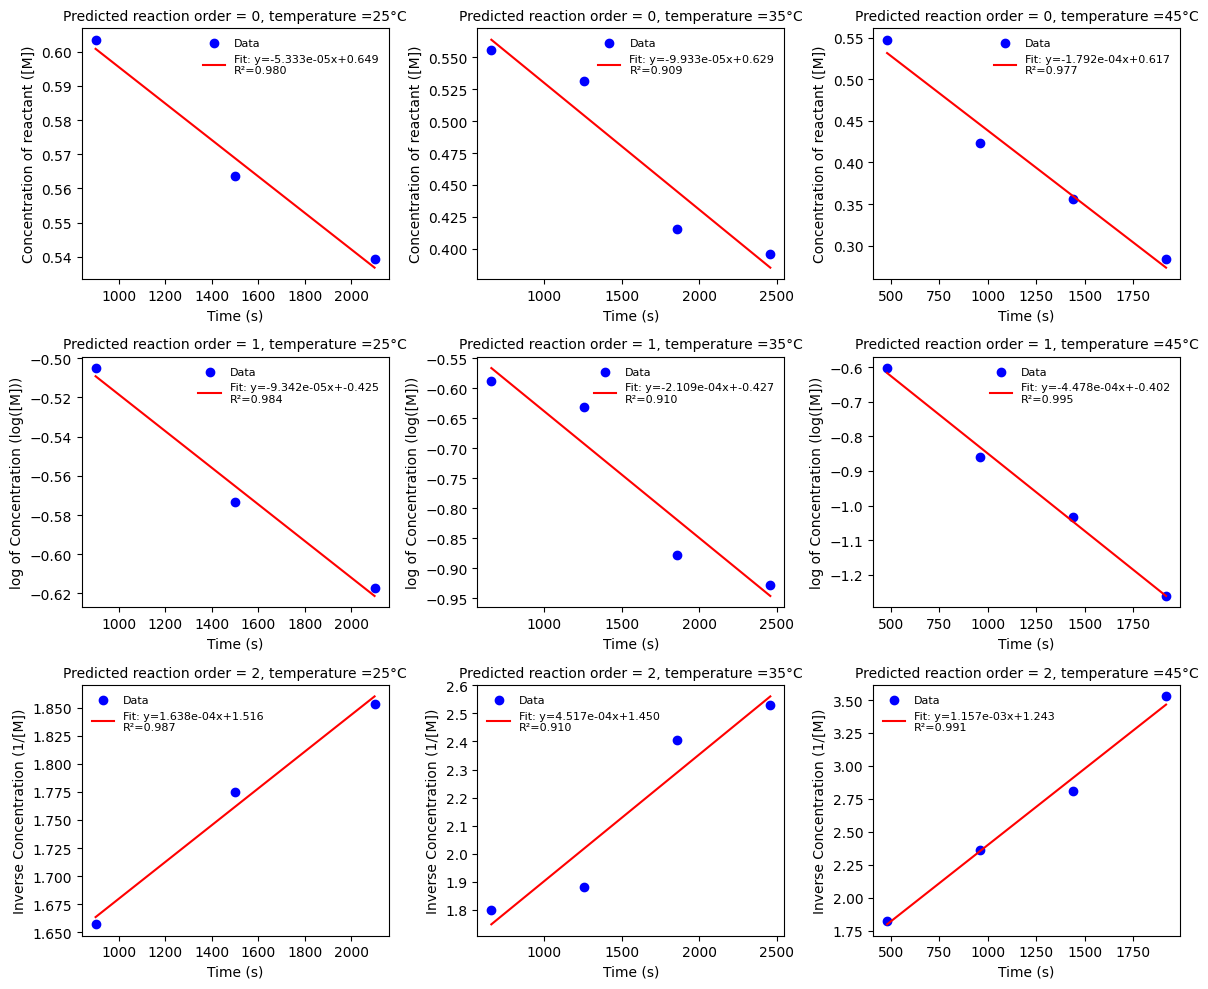

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 원본 데이터
x0 = np.array([900, 1500, 2100])
x1 = np.array([660, 1260, 1860, 2460])
x2 = np.array([480, 960, 1440, 1920])

y00 = np.array([0.60348397, 0.56348397, 0.53948397])
y10 = np.array([0.55548397, 0.53148397, 0.41548397, 0.39548397])
y20 = np.array([0.54748397, 0.42348397, 0.35548397, 0.28348397])

# 변환된 데이터
y01 = np.log(y00)
y11 = np.log(y10)
y21 = np.log(y20)

y03 = 1/np.array(y00)
y13 = 1/np.array(y10)
y23 = 1/np.array(y20)

# 데이터 묶음
x_list = [x0, x1, x2]
y_list = [
    [y00, y01, y03],
    [y10, y11, y13],
    [y20, y21, y23]
]
temp = [25, 35, 45]
# 플롯 설정
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)


label_case = ["Concentration of reactant ([M])", "log of Concentration (log([M]))", "Inverse Concentration (1/[M])"]

for i in range(3):      # 행 (dataset 종류)
    
    print("###############\n")
    for j in range(3):  # 열 (변환 종류)
        ax = axes[j, i]
        x = x_list[i].reshape(-1, 1)
        y = y_list[i][j]

        # 산점도
        ax.scatter(x, y, color='blue', label='Data')

        # 선형근사
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)
        print(f"기울기 (slope): {model.coef_[0]}")

        # R² 계산
        r2 = r2_score(y, y_pred)

        # 근사선 플롯
        ax.plot(x, y_pred, color='red',
                label=f'Fit: y={model.coef_[0]:.3e}x+{model.intercept_:.3f}\nR²={r2:.3f}')

        # 라벨 및 제목
        ax.set_title(f'Predicted reaction order = {j}, temperature ={temp[i]}°C', fontsize =10)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel(f'{label_case[j]}')
        ax.legend(fontsize=8, frameon=False)

plt.tight_layout()
plt.show()


In [31]:
a =9.3422005751433e-5
at = 300.15
b = 2.109029154949256e-4
bt = 310.15
c = 4.4782673300452044e-4
ct = 320.15

print(-(np.log(a)-np.log(b))*8.314/(1/at-1/bt))

63021.55486923676
